In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
plt.style.use('seaborn')
plt.style.use('matplotlibrc.py')

Using TensorFlow backend.


In [2]:
seed = 7
np.random.seed(seed)

In [3]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
def graph_predictions(l,df_original,y_train_pr,y_test_pr):
    plt.plot(df_original) 
    months_tr = np.arange(l,len(y_train_pr)+l) #meses de training
    months_ts = np.arange(len(y_train_pr)+(2*l)+1,len(df_original)-1) #meses de testing
    plt.plot(months_tr,y_train_pr,label='train') #grafico de train results
    plt.plot(months_ts,y_test_pr,label='test') #grafico de test results
    plt.xlabel('Días')
    plt.ylabel('Casos/100 mil hab.')
    plt.legend(fontsize=14)
    #plt.savefig('brc_6.pdf')
    plt.show()

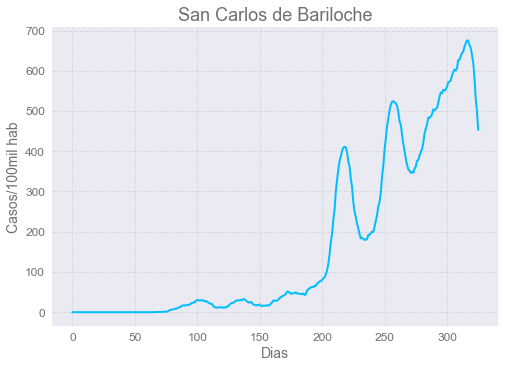

In [5]:
file_dir = 'Datos/RiesgoBariloche'
data = pd.read_csv(file_dir,sep=",",quotechar='"',na_values=[''])
data = data["incidenciaAcum14d"]
df = pd.DataFrame(data)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.title('San Carlos de Bariloche')
plt.plot(df)
df = df.to_numpy()
df1 = df[-20:-10]
df = df[:-20]
df_original = np.copy(df)
df = df.flatten()
scaler = MinMaxScaler(feature_range=(0, 1))

Text(0.5, 1.0, 'San Carlos de Bariloche')

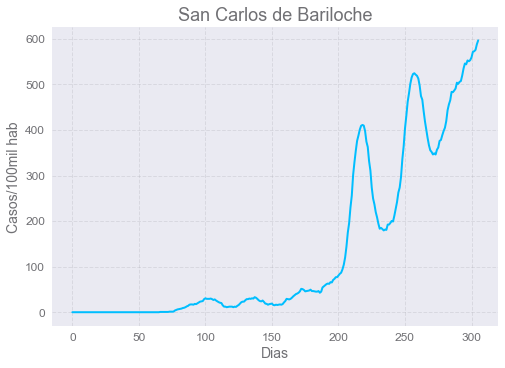

In [6]:
plt.plot(df)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.title('San Carlos de Bariloche')
#plt.savefig('brc_1.pdf')

In [7]:
total_size = df.shape[0]
train_size = int(0.8*total_size)
test_size = total_size - train_size
train_data = df[:-test_size]
test_data = df[-test_size:]

In [8]:
print('Data train size: ',train_size)
print('Data test size: ',test_size)

Data train size:  244
Data test size:  62


In [9]:
tw = 3
train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
x_train, y_train = create_dataset(train_data_scaled, tw)
x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))
x_test, y_test = create_dataset(test_data_scaled, tw)
x_test = x_test.reshape(x_test.shape[0],1,x_test.shape[1])

In [10]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=16,activation='relu',input_shape=(1,tw)))
model.add(keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss=keras.losses.MSE,metrics=['mse']) 
model.summary()
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=8,verbose=2) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________
Train on 240 samples, validate on 58 samples
Epoch 1/500
 - 1s - loss: 0.0754 - mse: 0.0754 - val_loss: 1.2070 - val_mse: 1.2070
Epoch 2/500
 - 0s - loss: 0.0625 - mse: 0.0625 - val_loss: 1.0455 - val_mse: 1.0455
Epoch 3/500
 - 0s - loss: 0.0527 - mse: 0.0527 - val_loss: 0.9127 - val_mse: 0.9127
Epoch 4/500
 - 0s - loss: 0.0455 - mse: 0.0455 - val_loss: 0.7607 - val_mse: 0.7607
Epoch 5/500
 - 0s - loss: 0.0389 - mse: 0.0389 - val_loss: 0.6268 - val_mse: 0.6268
Epoch 6/500
 - 0s - loss: 0.0323 - mse: 0.0323 - 

Epoch 87/500
 - 0s - loss: 8.6029e-04 - mse: 8.6029e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 88/500
 - 0s - loss: 8.4786e-04 - mse: 8.4786e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 89/500
 - 0s - loss: 8.4231e-04 - mse: 8.4231e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 90/500
 - 0s - loss: 8.2642e-04 - mse: 8.2642e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 91/500
 - 0s - loss: 8.1908e-04 - mse: 8.1908e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 92/500
 - 0s - loss: 8.1674e-04 - mse: 8.1674e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 93/500
 - 0s - loss: 8.2318e-04 - mse: 8.2318e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 94/500
 - 0s - loss: 8.1882e-04 - mse: 8.1882e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 95/500
 - 0s - loss: 8.1045e-04 - mse: 8.1045e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 96/500
 - 0s - loss: 8.1178e-04 - mse: 8.1178e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 97/500
 - 0s - loss: 8.1087e-04 - mse: 8.1087e-04 - val_loss: 0.

Epoch 175/500
 - 0s - loss: 4.8055e-04 - mse: 4.8055e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 176/500
 - 0s - loss: 4.7254e-04 - mse: 4.7254e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 177/500
 - 0s - loss: 4.7056e-04 - mse: 4.7056e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 178/500
 - 0s - loss: 4.5845e-04 - mse: 4.5845e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 179/500
 - 0s - loss: 4.6386e-04 - mse: 4.6387e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 180/500
 - 0s - loss: 4.5792e-04 - mse: 4.5792e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 181/500
 - 0s - loss: 4.5874e-04 - mse: 4.5874e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 182/500
 - 0s - loss: 4.5101e-04 - mse: 4.5101e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 183/500
 - 0s - loss: 4.5118e-04 - mse: 4.5118e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 184/500
 - 0s - loss: 4.4497e-04 - mse: 4.4497e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 185/500
 - 0s - loss: 4.5240e-04 - mse: 4.5240e-04 - v

Epoch 263/500
 - 0s - loss: 1.5742e-04 - mse: 1.5742e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 264/500
 - 0s - loss: 1.5892e-04 - mse: 1.5892e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 265/500
 - 0s - loss: 1.5860e-04 - mse: 1.5860e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 266/500
 - 0s - loss: 1.4926e-04 - mse: 1.4926e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 267/500
 - 0s - loss: 1.4078e-04 - mse: 1.4078e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 268/500
 - 0s - loss: 1.4113e-04 - mse: 1.4113e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 269/500
 - 0s - loss: 1.3954e-04 - mse: 1.3954e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 270/500
 - 0s - loss: 1.4673e-04 - mse: 1.4673e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 271/500
 - 0s - loss: 1.4817e-04 - mse: 1.4817e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 272/500
 - 0s - loss: 1.2485e-04 - mse: 1.2485e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 273/500
 - 0s - loss: 1.2989e-04 - mse: 1.2989e-04 - v

Epoch 346/500
 - 0s - loss: 7.6085e-05 - mse: 7.6085e-05 - val_loss: 8.7262e-04 - val_mse: 8.7262e-04
Epoch 347/500
 - 0s - loss: 7.3320e-05 - mse: 7.3320e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 348/500
 - 0s - loss: 7.6814e-05 - mse: 7.6814e-05 - val_loss: 9.1300e-04 - val_mse: 9.1300e-04
Epoch 349/500
 - 0s - loss: 8.8586e-05 - mse: 8.8586e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 350/500
 - 0s - loss: 8.0203e-05 - mse: 8.0203e-05 - val_loss: 8.7279e-04 - val_mse: 8.7279e-04
Epoch 351/500
 - 0s - loss: 8.9627e-05 - mse: 8.9627e-05 - val_loss: 8.8857e-04 - val_mse: 8.8857e-04
Epoch 352/500
 - 0s - loss: 8.3866e-05 - mse: 8.3866e-05 - val_loss: 8.8551e-04 - val_mse: 8.8551e-04
Epoch 353/500
 - 0s - loss: 7.2165e-05 - mse: 7.2165e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 354/500
 - 0s - loss: 7.2446e-05 - mse: 7.2446e-05 - val_loss: 9.4043e-04 - val_mse: 9.4043e-04
Epoch 355/500
 - 0s - loss: 7.5456e-05 - mse: 7.5456e-05 - val_loss: 9.6636e-04 - val_mse: 9.6636e-04
Epoc

Epoch 428/500
 - 0s - loss: 6.9820e-05 - mse: 6.9820e-05 - val_loss: 8.1931e-04 - val_mse: 8.1931e-04
Epoch 429/500
 - 0s - loss: 7.4154e-05 - mse: 7.4154e-05 - val_loss: 8.2302e-04 - val_mse: 8.2302e-04
Epoch 430/500
 - 0s - loss: 8.5589e-05 - mse: 8.5589e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 431/500
 - 0s - loss: 8.2539e-05 - mse: 8.2539e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 432/500
 - 0s - loss: 6.9602e-05 - mse: 6.9602e-05 - val_loss: 8.3030e-04 - val_mse: 8.3030e-04
Epoch 433/500
 - 0s - loss: 7.0700e-05 - mse: 7.0700e-05 - val_loss: 8.3538e-04 - val_mse: 8.3538e-04
Epoch 434/500
 - 0s - loss: 6.9989e-05 - mse: 6.9989e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 435/500
 - 0s - loss: 7.0278e-05 - mse: 7.0278e-05 - val_loss: 8.2272e-04 - val_mse: 8.2272e-04
Epoch 436/500
 - 0s - loss: 6.8120e-05 - mse: 6.8120e-05 - val_loss: 8.6191e-04 - val_mse: 8.6191e-04
Epoch 437/500
 - 0s - loss: 7.0531e-05 - mse: 7.0531e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 438/50

In [11]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [12]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

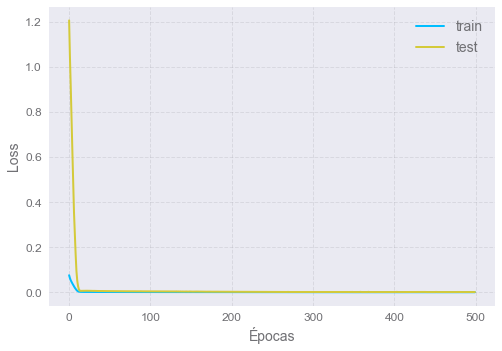

In [13]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(fontsize=14)
#plt.savefig('brc_2.pdf')

Text(0, 0.5, 'Casos/100mil hab')

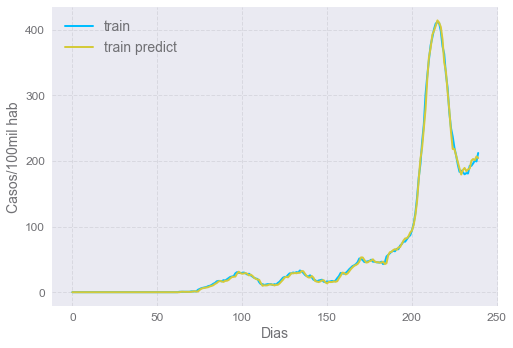

In [14]:
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)),label='train')
plt.plot(train_predict,label='train predict')
plt.legend(fontsize=14)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
#plt.savefig('brc_3.pdf')

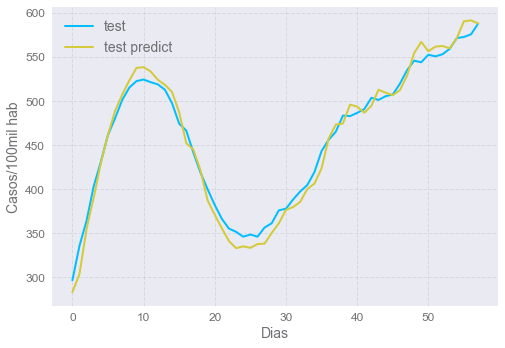

In [15]:
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),label='test')
plt.plot(test_predict,label='test predict')
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.legend(fontsize=14)
#plt.savefig('brc_4.pdf')

In [16]:
print('train mse squared:',mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))
print('test mse squared:',mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict)) 
print('train r2 score:',r2_score(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))
print('test r2 score:',r2_score(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict)) 
print('train mae:',mean_absolute_error(y_train,train_predict))
print('test mae:',mean_absolute_error(y_test,test_predict)) 

train mse squared: 11.286774835769968
test mse squared: 133.21437956277404
train r2 score: 0.9988038616723475
test r2 score: 0.9769061996865711
train mae: 57.549970140303344
test mae: 457.267916658713


In [17]:
print(x_train.shape)

(240, 1, 3)


In [18]:
n = len(test_data_scaled)
lag = tw
x_input=test_data_scaled[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<10): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, lag))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, lag))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

1 day output [[1.5991896]]
2 day output [[1.7399955]]
3 day output [[1.9514954]]
4 day output [[2.2858443]]
5 day output [[2.8154516]]
6 day output [[3.674757]]
7 day output [[5.0744824]]
8 day output [[7.323539]]
9 day output [[10.8350725]]


In [19]:
lst_output = scaler.inverse_transform(lst_output)

[23088812.19704777]
[[  18.95960649]
 [  56.95182518]
 [ 109.32800655]
 [ 175.49233266]
 [ 312.30234661]
 [ 521.42622378]
 [ 866.0592902 ]
 [1438.91750045]
 [2350.47702747]
 [3785.20230129]]


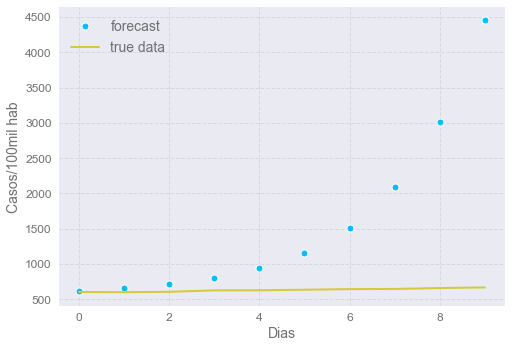

In [20]:
plt.plot(lst_output,'o',label='forecast')
plt.plot(df1,label='true data')
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.legend(fontsize=14)
#plt.savefig('brc_5.pdf')
print(sum((lst_output-df1)**2))
print(lst_output - df1)

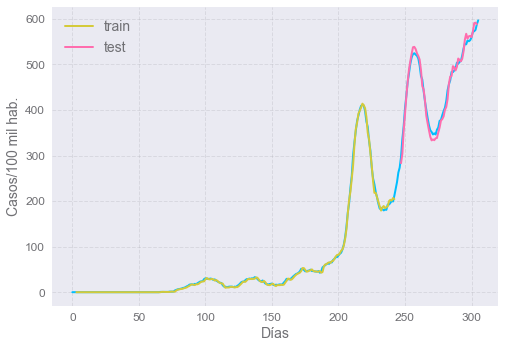

In [21]:
graph_predictions(tw,df_original,train_predict,test_predict)

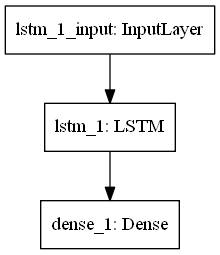

In [22]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=False, show_layer_names=True, rankdir="TB")